# Example 1. Majority Votting Method
---

### 1. Ensemble error curve

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.misc import comb

In [2]:
# the binomial error as target class is choosen
def ensemble_error(n_classifier, error):
    k_start = math.ceil(n_classifier/2.) 
    probs = [comb(n_classifier, k)*(error**k)*((1-error)**(n_classifier-k)) 
             for k in range(int(k_start), n_classifier+1)]
    return sum(probs)

In [3]:
ensemble_error(n_classifier=11, error=0.25)

0.034327507019042969

In [4]:
error_range = np.arange(0., 1.01, 0.01)
ens_errors = [ensemble_error(n_classifier=11, error=error) for error in error_range]

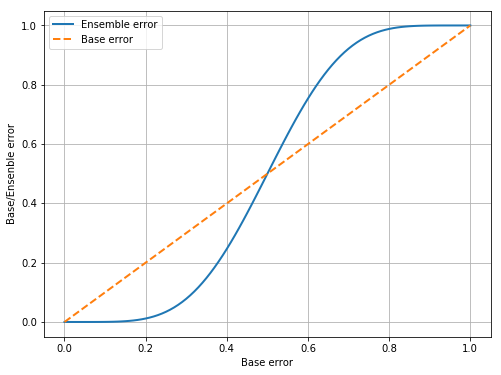

In [5]:
plt.figure(figsize=(8,6))
plt.plot(error_range, ens_errors,  label='Ensemble error', linewidth=2)
plt.plot(error_range, error_range, label='Base error',     linewidth=2, linestyle='--')
plt.xlabel('Base error')
plt.ylabel('Base/Ensenble error')
plt.legend(loc='upper left')
plt.grid()
plt.show()

### 2. Iris example of aggregation
#### 2.1. Import package and data

In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.preprocessing   import LabelEncoder

In [7]:
le = LabelEncoder()
iris = datasets.load_iris()
X = iris.data[50:, [1,2]]
y = le.fit_transform(iris.target[50:])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

#### 2.2. Train individual model

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model    import LogisticRegression
from sklearn.tree            import DecisionTreeClassifier
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.pipeline        import Pipeline
from MajorityVoteClassifier  import *

In [9]:
clf_labels = ['Logistic Regression', 'KNN', 'Decision Tree', 'Majority voting']
clf1 = Pipeline([['sc',  StandardScaler()], 
                 ['clf', LogisticRegression(penalty='l2', C=0.001, random_state=0)]])
clf2 = Pipeline([['sc',  StandardScaler()], 
                 ['clf', KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')]])
clf3 = DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=0)
# Ensemble above classifiers by Majority Voting Method
clf4 = MajorityVoteClassifier([clf1, clf2, clf3])

In [10]:
for clf, label in zip([clf1, clf2, clf3, clf4], clf_labels):
    score = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring='roc_auc')
    print 'ROC AUC (10-fold x-val): %.2f (+/- %.2f) [%s]'%(score.mean(), score.std(), label)

ROC AUC (10-fold x-val): 0.92 (+/- 0.20) [Logistic Regression]
ROC AUC (10-fold x-val): 0.93 (+/- 0.10) [KNN]
ROC AUC (10-fold x-val): 0.92 (+/- 0.15) [Decision Tree]
ROC AUC (10-fold x-val): 0.97 (+/- 0.10) [Majority voting]
